In [10]:
import pandas as pd

# Load in all the files
schedule_data = pd.read_json('schedule_data.json', orient='split')
stop_data = pd.read_csv('stop_data.csv')
path_df = pd.read_json('route_paths.json', orient='split')
new_route_info = pd.read_json('route_data_new.json', orient='split')

In [11]:
new_route_info.drop(['lat','lon','stopId','tag','title','dir'], inplace=True, axis=1)
new_route_info.head()

,route_id,route_name,type
0,E,E-Embarcadero,streetcar
1,F,F-Market & Wharves,streetcar
2,J,J-Church,rail
3,JBUS,JBUS-J Church Bus,bus
4,KT,KT-Ingleside-Third Street,rail


In [12]:
import json 
temp = {'type':[],'name':[],'id':[]}
for _, row in new_route_info.iterrows():
    if row['type'] in temp['type']:
        index = temp['type'].index(row['type'])
        temp['name'][index].append(row['route_name'])
        temp['id'][index].append(row['route_id'])
    else:
        temp['type'].append(row['type'])
        temp['name'].append([row['route_name'],])
        temp['id'].append([row['route_id'],])
    
with open('dropdown_new.txt', 'w') as outfile:
    json.dump(temp, outfile)

In [12]:
import plotly.graph_objects as go
traces = []
routes = [9,23,15,7]
colors = {'bus':'red','rapid':'red','rail':'red','streetcar':'green','express':'red','shuttle':'yellow','overnight':'red','cablecar':'green'}
symbols = {'bus':'bus','rapid':'bus','rail':'rail-metro','streetcar':'rail-light','express':'bus','shuttle':'car','overnight':'bus','cablecar':'rail-light'}
names = []
types = {'bus':[]}
i,y = 0,0

for index, row in path_df.iloc[routes,:].iterrows():    
    stopcoords = {'lats':[], 'lngs':[]}
    mask = new_route_info['route_id'] == row['tag']
    names.append({'route_id':row['tag'], 'route_name':row['name'], 'traces':[]})
    for path in row['path']:
        lats, lngs = [], []
        for p in path:
            lats.append(float(p[0]))
            lngs.append(float(p[1]))
    
        # Create route lines for individual routes
        traces.append(go.Scattermapbox(
            mode = "lines",
            lon = lngs, lat = lats,
            hoverinfo='none',
            marker={'color':colors[new_route_info[mask]['type'].values[0]]}))
        names[i]['traces'].append(y)
        y+=1
        
    #Get Bus/tram locations
    stopcoords['lats'].extend(new_route_info[mask]['lat'].values[0])
    stopcoords['lngs'].extend(new_route_info[mask]['lon'].values[0])
    # Create Bus/train stop icons    
    data = [io.capitalize() for io in new_route_info[mask]["dir"].values[0]]
    
    traces.append(go.Scattermapbox(
        mode = "markers",
        lon = stopcoords['lngs'], lat = stopcoords['lats'],
        marker={'size': 12,'color':'black', 'symbol':[symbols[new_route_info[mask]['type'].values[0]]] * len(stopcoords['lats'])},
        text=new_route_info[mask]["title"].values[0],
        customdata=data,
        hovertemplate='<b>Name:</b> %{text}<br>' +
        '<b>Direction:</b> %{customdata}' +
        '<extra></extra>'))
    names[i]['traces'].append(y)
    if new_route_info[mask]['type'].values[0] in types.keys():
        types[new_route_info[mask]['type'].values[0]].append(i)
    else:
        types[new_route_info[mask]['type'].values[0]]= [i]
    y+=1
    i+=1


In [14]:
types

{'bus': [0, 1, 3], 'express': [2]}

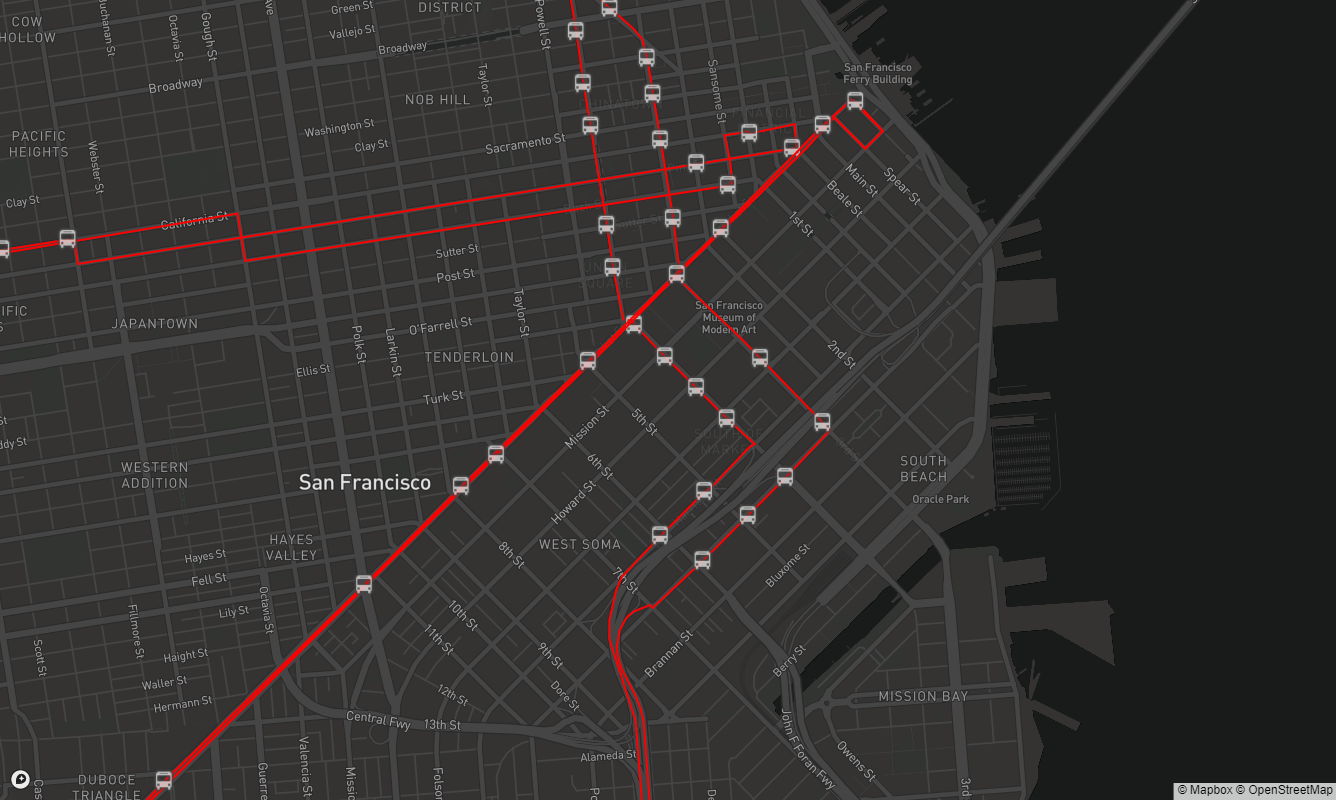

In [15]:
token = open(".mapbox_token").read() # you need your own token

fig = go.Figure(traces)

fig.update_layout(
    mapbox_style="dark",
    mapbox_zoom=11.25,
    mapbox_center = {"lat": 37.76, "lon": -122.4},
    mapbox = {
        'accesstoken': token},
    showlegend = False,
    margin={"r":0,"t":0,"l":0,"b":0},
    width=800,
    height=800)

fig.show()

In [ ]:
{'route_id':row['tag'], 'route_name':row['name'], 'traces':[], 'type:'[]}